In [1]:
#pip install xgboost

# !pip install shap


In [2]:
# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 选择需要计算权重的列
columns_to_select = [
   '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', 
    '居民最低生活保障人数(人)', '15岁及以上文盲人口数(人口抽样调查)(人)'
]


In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['font.size'] =18
plt.rcParams['font.sans-serif'] = ['SimHei']#解决图表中中文显示问题
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# matplotlib.rcParams['font.size'] = 0.3
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir('D:\\BaiduSyncdisk\\EHF-文献-数据-文章\\EHF\\EHF\\figure-统计\\mean') #笔记本电脑
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter5')     #台式机

cmap =list(["steelblue", "yellowgreen","orange","lightcoral","red", "green","lightskyblue"])

## 前期数据查看与处理

In [20]:
# 载入之前保存的 'area_mean_by_province_year_with_chinese' 数据
yearbook_file = 'final_merged_data.xlsx'
model_data = pd.read_excel(yearbook_file, sheet_name='Sheet1')

feature_names = model_data.columns.tolist()[4::]
print(feature_names)

# List of columns to select
columns_to_select = [
    'HWA', 'HWD', 'HWF', 'HWM', 'HWN', 'Area'
    # ,
    # '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', 
    # '居民最低生活保障人数(万人)', '15岁及以上文盲人口数(人口抽样调查)(人)', 
    # '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', 
    # '每万人医疗机构床位数(张)', '卫生人员数(万人)', '平均预期寿命(岁)', 
    # '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', 
    # '人均日生活用水量(升)', '自动气象站站点个数(个)', 
    # '居民平均每百户年末移动电话拥有量(部)', '互联网上网人数(万人)', 
    # '人均城市道路面积(平方米)'
]

# # Select the columns from the DataFrame
# X = model_data[columns_to_select]
# y = model_data["消化系统疾病死亡数量"]

import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 删除目标变量 y 中值为0的行
non_zero_data = model_data[model_data['夏季死亡数量'] != 0]

# 更新 X 和 y 数据
X = non_zero_data[columns_to_select]
y = non_zero_data["夏季死亡数量"]

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['HWA', 'HWD', 'HWF', 'HWM', 'HWN', '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', '居民最低生活保障人数(万人)', '城市居民最低生活保障人数(万人)', '农村居民最低生活保障人数(万人)', '15岁及以上文盲人口数(人口抽样调查)(人)', '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', '每万人医疗机构床位数(张)', '卫生人员数(万人)', '平均预期寿命(岁)', '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', '人均日生活用水量(升)', '自动气象站站点个数(个)', '居民平均每百户年末移动电话拥有量(部)', '互联网上网人数(万人)', '人均城市道路面积(平方米)', '年末常住人口(万人)', '人口死亡率(‰)', '死亡人数', '传染病死亡数量', '寄生虫病死亡数量', '恶性肿瘤死亡数量', '血液造血免疫疾病死亡数量', '内分泌、营养及代谢疾病死亡数量', '精神障碍死亡数量', '神经系统疾病死亡数量', '心脏病死亡数量', '脑血管病死亡数量', '消化系统疾病死亡数量', '肌肉骨骼和结缔组织疾病死亡数量', '泌尿生殖系统疾病死亡数量', '产科疾病死亡数量', '围生期疾病死亡数量', '先天异常死亡数量', '诊断不明死亡数量', '伤害死亡数量', '其他疾病死亡数量', '夏季死亡数量']


In [21]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set global font for matplotlib to a font that supports Chinese characters
rcParams['font.sans-serif'] = ['SimHei']  # Or another font that supports Chinese
rcParams['axes.unicode_minus'] = False  # To handle minus signs properly

# # Now plotting should work without warnings
# plt.tight_layout()
# plt.show()


In [25]:
# 导入必要的库
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd

# 假设你已经有数据，并且X为特征，y为标签
# 例如：假设我们使用随机数据集
# X = np.random.rand(100, 10)
# y = np.random.rand(100)

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost参数空间
def xgb_evaluate(max_depth, gamma, subsample, colsample_bytree):
    params = {
        'eval_metric': 'rmse',
        'max_depth': int(max_depth),
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eta': 0.1
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, early_stopping_rounds=10)
    return -cv_result['test-rmse-mean'].min()

# 贝叶斯优化
xgb_bo = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 10),
        'gamma': (0, 5),
        'subsample': (0.5, 1),
        'colsample_bytree': (0.5, 1)
    },
    random_state=42
)
xgb_bo.maximize(init_points=5, n_iter=25)

# 获取最优参数
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# 使用最优参数训练模型
model = xgb.train(params, dtrain, num_boost_round=100)

# 预测
y_pred = model.predict(dtest)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



|   iter    |  target   | colsam... |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------
| 1         | -7.541e+0 | 0.6873    | 4.754     | 8.124     | 0.7993    |
| 2         | -7.159e+0 | 0.578     | 0.78      | 3.407     | 0.9331    |
| 3         | -7.176e+0 | 0.8006    | 3.54      | 3.144     | 0.985     |
| 4         | -7.349e+0 | 0.9162    | 1.062     | 4.273     | 0.5917    |
| 5         | -7.372e+0 | 0.6521    | 2.624     | 6.024     | 0.6456    |
| 6         | -7.154e+0 | 0.6058    | 0.8609    | 3.471     | 0.8357    |
| 7         | -7.147e+0 | 0.5       | 1.984     | 3.0       | 0.9921    |
| 8         | -7.207e+0 | 0.5259    | 4.983     | 3.143     | 0.5833    |
| 9         | -7.81e+04 | 1.0       | 0.0       | 10.0      | 1.0       |
| 10        | -7.301e+0 | 1.0       | 5.0       | 4.946     | 1.0       |
| 11        | -7.202e+0 | 1.0       | 0.0       | 3.0       | 0.5       |
| 12        | -7.163e+0 | 0.5       | 

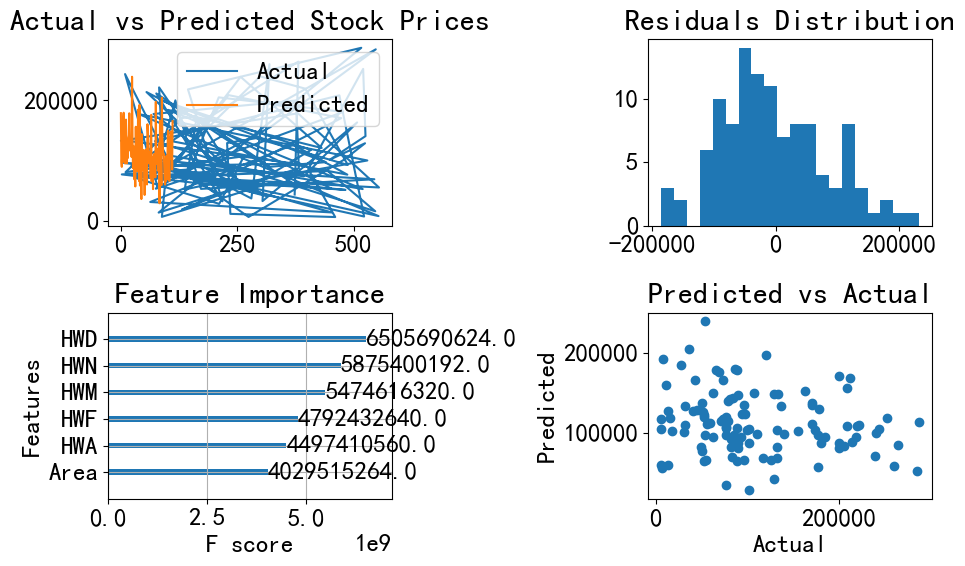

In [23]:
# 画图
plt.figure(figsize=(10, 6))

# 实际 vs 预测
plt.subplot(2, 2, 1)
plt.plot(y_test, label='Actual')  # 直接使用y_test，而非y_test.values
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# 残差图
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')

# 特征重要性图
plt.subplot(2, 2, 3)
xgb.plot_importance(model, ax=plt.gca(), importance_type="gain")
plt.title('Feature Importance')

# 预测值与真实值的散点图
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

plt.tight_layout()
# Save the figure
plt.savefig('PD-05-01-夏季死亡数量-热浪.png', dpi=400, facecolor="none", transparent=True)
plt.show()


## 熵权法示例解释

In [18]:
import numpy as np
import pandas as pd

def entropy_weight_method(data):
    """
    计算熵权法权重
    :param data: pandas DataFrame, 行为样本，列为指标
    :return: 各指标的权重
    """
    data = data.copy()  # 复制数据，避免修改原始数据

    # **Step 1: 数据标准化**
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]

    # **Step 2: 计算归一化权重**
    P = data.div(data.sum(axis=0))  # 计算各指标的比重

    # **Step 3: 计算信息熵**
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN

    # **Step 4: 计算熵权**
    weights = (1 - entropy) / np.sum(1 - entropy)

    return weights

# 示例数据（假设有3个样本，4个指标）
data = pd.DataFrame({
    '指标1': [10, 20, 30],
    '指标2': [200, 180, 160],
    '指标3': [0.8, 0.9, 1.0],
    '指标4': [50, 60, 70]
})

# 计算熵权
weights = entropy_weight_method(data)
print("各指标的熵权:", weights)


各指标的熵权: 指标1    0.25
指标2    0.25
指标3    0.25
指标4    0.25
dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


## 熵权法计算三个指标

In [26]:
import pandas as pd
import numpy as np

# 只选择特定的列进行熵权法计算
columns_to_select = [
    'HWA', 'HWD', 'HWF', 'HWM', 'HWN', "Area"
]

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

df_selected = df[columns_to_select]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算权重
weights_selected = entropy_weight_method(df_selected)

# 展示权重
weights_selected_df = pd.DataFrame(weights_selected, columns=["权重"], index=columns_to_select)
print(weights_selected_df)


            权重
HWA   0.130465
HWD   0.129248
HWF   0.099134
HWM   0.150610
HWN   0.170422
Area  0.320121


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [27]:
import pandas as pd
import numpy as np

# 只选择特定的列进行熵权法计算
columns_to_select = [
    '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', 
    '居民最低生活保障人数(人)', '15岁及以上文盲人口数(人口抽样调查)(人)'
]

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

df_selected = df[columns_to_select]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算权重
weights_selected = entropy_weight_method(df_selected)

# 展示权重
weights_selected_df = pd.DataFrame(weights_selected, columns=["权重"], index=columns_to_select)
print(weights_selected_df)


                              权重
65岁及以上人口数(人口抽样调查)(人)    0.282901
女性人口数(人口抽样调查)(人)        0.288258
居民最低生活保障人数(人)           0.083155
15岁及以上文盲人口数(人口抽样调查)(人)  0.345686


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [28]:
import pandas as pd
import numpy as np

# 只选择特定的列进行熵权法计算
columns_to_select = [
   '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', 
    '每万人医疗机构床位数(张)', '卫生人员数(人)', '平均预期寿命(岁)', 
    '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', 
    '人均日生活用水量(升)', '自动气象站站点个数(个)', 
    '居民平均每百户年末移动电话拥有量(部)', '互联网上网人数(人)', 
    '人均城市道路面积(平方米)'
]

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

df_selected = df[columns_to_select]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算权重
weights_selected = entropy_weight_method(df_selected)

# 展示权重
weights_selected_df = pd.DataFrame(weights_selected, columns=["权重"], index=columns_to_select)
print(weights_selected_df)


                           权重
人均地区生产总值(元/人)        0.107483
全体居民人均可支配收入(元)       0.114837
每万人医疗机构床位数(张)        0.056527
卫生人员数(人)             0.085398
平均预期寿命(岁)            0.018949
人均公园绿地面积(平方米/人)      0.023026
居民平均每百户年末空调拥有量(台)    0.158564
人均日生活用水量(升)          0.059715
自动气象站站点个数(个)         0.139925
居民平均每百户年末移动电话拥有量(部)  0.028323
互联网上网人数(人)           0.161182
人均城市道路面积(平方米)        0.046071


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [40]:
import pandas as pd
import numpy as np

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 选择需要计算权重的列
columns_to_select = [
    'HWA', 'HWD', 'HWF', 'HWM', 'HWN', "Area"
]

# 获取数据中选定列
df_selected = df[columns_to_select]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算选定列的权重
weights_selected = entropy_weight_method(df_selected)
print("weights_selected",weights_selected)
# 将权重应用到选定数据
weighted_data = df_selected.mul(weights_selected, axis=1)

# 显示结果
weighted_data.head()  # 查看前几行结果


# 计算 Hazard Index，通过对加权结果进行加和
hazard_index = weighted_data.sum(axis=1)

# 可选：如果需要将 Hazard Index 进行归一化到 [0, 1] 范围，可以执行如下操作：
hazard_index_normalized = (hazard_index - hazard_index.min()) / (hazard_index.max() - hazard_index.min())

# 将 Hazard Index 加入原始数据中，作为一个新的列
df['Hazard Index'] = hazard_index_normalized

# 显示结果
df[['Hazard Index']].head()  # 查看前几行结果


weights_selected HWA     0.130465
HWD     0.129248
HWF     0.099134
HWM     0.150610
HWN     0.170422
Area    0.320121
dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Hazard Index
0,0.191520
1,0.139669
2,0.148478
3,0.034361
4,0.000020


In [41]:
import pandas as pd
import numpy as np

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 选择需要计算权重的列
columns_to_select = [
   '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', 
    '居民最低生活保障人数(人)', '15岁及以上文盲人口数(人口抽样调查)(人)'
]

# 获取数据中选定列
df_selected = df[columns_to_select]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算选定列的权重
weights_selected = entropy_weight_method(df_selected)
print("weights_selected",weights_selected)
# 将权重应用到选定数据
weighted_data = df_selected.mul(weights_selected, axis=1)

# 显示结果
weighted_data.head()  # 查看前几行结果


# 计算 Hazard Index，通过对加权结果进行加和
hazard_index = weighted_data.sum(axis=1)

# 可选：如果需要将 Hazard Index 进行归一化到 [0, 1] 范围，可以执行如下操作：
# hazard_index_normalized = (hazard_index - hazard_index.min()) / (hazard_index.max() - hazard_index.min())

# 将 Hazard Index 加入原始数据中，作为一个新的列
df['Exposure Index'] = hazard_index_normalized

# 显示结果
df[['Exposure Index']].head()  # 查看前几行结果


weights_selected 65岁及以上人口数(人口抽样调查)(人)      0.282901
女性人口数(人口抽样调查)(人)          0.288258
居民最低生活保障人数(人)             0.083155
15岁及以上文盲人口数(人口抽样调查)(人)    0.345686
dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Exposure Index
0,0.191520
1,0.139669
2,0.148478
3,0.034361
4,0.000020


In [86]:
import pandas as pd
import numpy as np

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 选择需要计算权重的列
columns_to_select = [
  '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', 
    '每万人医疗机构床位数(张)', '卫生人员数(人)',  
    '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', 
    '人均日生活用水量(升)', '自动气象站站点个数(个)', 
    '居民平均每百户年末移动电话拥有量(部)', 
    '人均城市道路面积(平方米)'
]

# 获取数据中选定列
df_selected = df[columns_to_select]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算选定列的权重
weights_selected = entropy_weight_method(df_selected)
print("weights_selected",weights_selected)
# 将权重应用到选定数据
weighted_data = df_selected.mul(weights_selected, axis=1)

# 显示结果
weighted_data.head()  # 查看前几行结果


# 计算 Hazard Index，通过对加权结果进行加和
hazard_index = weighted_data.sum(axis=1)

# 可选：如果需要将 Hazard Index 进行归一化到 [0, 1] 范围，可以执行如下操作：
hazard_index_normalized = (hazard_index - hazard_index.min()) / (hazard_index.max() - hazard_index.min())

# 将 Hazard Index 加入原始数据中，作为一个新的列
df['Adaptation Index'] = hazard_index_normalized 

# 显示结果
df[['Adaptation Index']].head()  # 查看前几行结果


weights_selected 人均地区生产总值(元/人)          0.131098
全体居民人均可支配收入(元)         0.140067
每万人医疗机构床位数(张)          0.068946
卫生人员数(人)               0.104161
人均公园绿地面积(平方米/人)        0.028084
居民平均每百户年末空调拥有量(台)      0.193402
人均日生活用水量(升)            0.072835
自动气象站站点个数(个)           0.170667
居民平均每百户年末移动电话拥有量(部)    0.034546
人均城市道路面积(平方米)          0.056193
dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Adaptation Index
0,0.140099
1,0.142231
2,0.138592
3,0.141455
4,0.147014


In [3]:
import pandas as pd
import numpy as np

# 读取数据
file_path = 'yearbook_data_2000_2022.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# --- 计算 Hazard Index ---
# 选择需要计算权重的列
columns_to_select_hazard = [
    # 'HWA', 'HWD', 'HWF', 'HWM', 'HWN', 'Area'
        # 'HWM',  'HWF', 'HWN', 'Area'
       'HWF'
]

# 获取数据中选定列
df_selected_hazard = df[columns_to_select_hazard]

# 计算熵权法权重
def entropy_weight_method(data):
    data = data.copy()
    
    # 数据标准化
    X_min = data.min()
    X_max = data.max()
    data = (data - X_min) / (X_max - X_min)  # 归一化到 [0,1]
    
    # 计算归一化比重
    P = data.div(data.sum(axis=0)) 
    
    # 计算信息熵
    k = 1 / np.log(len(data))
    entropy = -k * (P * np.log(P)).sum(axis=0)
    entropy = entropy.fillna(0)  # 处理 log(0) 导致的 NaN
    
    # 计算熵权
    weights = (1 - entropy) / np.sum(1 - entropy)
    
    return weights

# 计算 Hazard Index 权重
weights_hazard = entropy_weight_method(df_selected_hazard)
# 将权重应用到选定数据
weighted_data_hazard = df_selected_hazard.mul(weights_hazard, axis=1)
# 计算 Hazard Index
hazard_index = weighted_data_hazard.sum(axis=1)
hazard_index_normalized = (hazard_index - hazard_index.min()) / (hazard_index.max() - hazard_index.min())

# --- 计算 Exposure Index ---
# 选择需要计算权重的列
columns_to_select_exposure = [
   # '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', 
   # '居民最低生活保障人数(人)', '15岁及以上文盲人口数(人口抽样调查)(人)'

       '老年人口(人)', 
   '居民最低生活保障人数(人)'
]

# 获取数据中选定列
df_selected_exposure = df[columns_to_select_exposure]

# 计算 Exposure Index 权重
weights_exposure = entropy_weight_method(df_selected_exposure)
# 将权重应用到选定数据
weighted_data_exposure = df_selected_exposure.mul(weights_exposure, axis=1)
# 计算 Exposure Index
exposure_index = weighted_data_exposure.sum(axis=1)
exposure_index_normalized = (exposure_index - exposure_index.min()) / (exposure_index.max() - exposure_index.min())

# --- 计算 Adaptation Index ---
# 选择需要计算权重的列
columns_to_select_adaptation = [
  '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', 
  '每万人医疗机构床位数(张)', '卫生人员数(人)',
  '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', 
  '人均日生活用水量(升)', '自动气象站站点个数(个)', 
  '居民平均每百户年末移动电话拥有量(部)',  
  '人均城市道路面积(平方米)'
]

# 获取数据中选定列
df_selected_adaptation = df[columns_to_select_adaptation]

# 计算 Adaptation Index 权重
weights_adaptation = entropy_weight_method(df_selected_adaptation)
# 将权重应用到选定数据
weighted_data_adaptation = df_selected_adaptation.mul(weights_adaptation, axis=1)
# 计算 Adaptation Index
adaptation_index = weighted_data_adaptation.sum(axis=1)
adaptation_index_normalized = (adaptation_index - adaptation_index.min()) / (adaptation_index.max() - adaptation_index.min())

# --- 将结果添加到原始数据框中 ---
df['Hazard Index'] = hazard_index_normalized
df['Exposure Index'] = exposure_index_normalized
df['Adaptation Index'] = adaptation_index_normalized

# 显示结果
print(df[['Hazard Index', 'Exposure Index', 'Adaptation Index']].head())

# 可选：保存结果到新的 Excel 文件
df.to_excel("hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx", index=False)


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


   Hazard Index  Exposure Index  Adaptation Index
0      0.346019        0.401369          0.140099
1      0.364760        0.423200          0.142231
2      0.347255        0.426863          0.138592
3      0.266941        0.425395          0.141455
4      0.354436        0.437988          0.147014


## 建立模型

In [162]:
# 载入之前保存的 'area_mean_by_province_year_with_chinese' 数据
yearbook_file = 'hazard_exposure_adaptation_index_results.xlsx'
model_data = pd.read_excel(yearbook_file, sheet_name='Sheet1')

# feature_names = model_data.columns.tolist()[4::]
# print(feature_names)

# List of columns to select
columns_to_select = [
    'Hazard Index', 'Exposure Index', 'Adaptation Index'
]

# # Select the columns from the DataFrame
# X = model_data[columns_to_select]
# y = model_data["消化系统疾病死亡数量"]

import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 删除目标变量 y 中值为0的行
non_zero_data = model_data[model_data['人口死亡数量(人)'] != 0]

# 更新 X 和 y 数据
X = non_zero_data[columns_to_select]
y = non_zero_data["人口死亡数量(人)"]

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)


## RMSE 超参数

In [54]:
# XGBoost参数空间
def xgb_evaluate(max_depth, gamma, subsample, colsample_bytree):
    params = {
        'eval_metric': 'rmse',
        'max_depth': int(max_depth),
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eta': 0.1
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, early_stopping_rounds=10)
    return -cv_result['test-rmse-mean'].min()

# 贝叶斯优化
xgb_bo = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 10),
        'gamma': (0, 5),
        'subsample': (0.5, 1),
        'colsample_bytree': (0.5, 1)
    },
    random_state=42
)
xgb_bo.maximize(init_points=5, n_iter=25)

# 获取最优参数
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# 使用最优参数训练模型
# model = xgb.train(params, dtrain, num_boost_round=100)
# 
# 预测
# y_pred = model.predict(dtest)


print("params:",params)
# 使用最优参数训练模型
model = xgb.train(params, dtrain, num_boost_round=100)

# 预测
y_pred = model.predict(dtest)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)

# 计算真实值的平均值
y_test_mean = np.mean(y_test)

# 计算 RMSE%
rmse_percent = (rmse / y_test_mean) * 100

# 打印结果
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Root Mean Squared Error (RMSE%) = {rmse_percent:.2f}%')

R2 = r2_score(y_test, y_pred)
print(f'R2: {R2}')

|   iter    |  target   | colsam... |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------
| 1         | -7.158e+0 | 0.6873    | 4.754     | 8.124     | 0.7993    |
| 2         | -7.904e+0 | 0.578     | 0.78      | 3.407     | 0.9331    |
| 3         | -6.582e+0 | 0.8006    | 3.54      | 3.144     | 0.985     |
| 4         | -6.645e+0 | 0.9162    | 1.062     | 4.273     | 0.5917    |
| 5         | -9.09e+04 | 0.6521    | 2.624     | 6.024     | 0.6456    |
| 6         | -6.624e+0 | 0.8616    | 3.34      | 4.56      | 0.5319    |
| 7         | -9.708e+0 | 0.5246    | 0.09242   | 7.204     | 0.8619    |
| 8         | -9.149e+0 | 0.5022    | 0.2018    | 6.265     | 0.6761    |
| 9         | -6.648e+0 | 0.8227    | 2.41      | 3.668     | 0.5523    |
| 10        | -6.323e+0 | 1.0       | 5.0       | 3.951     | 0.5       |
| 11        | -6.786e+0 | 1.0       | 5.0       | 10.0      | 0.5       |
| 12        | -6.786e+0 | 1.0       | 

Feature: Hazard Index, Normalized Gain: 0.0421
Feature: Exposure Index, Normalized Gain: 0.3201
Feature: Adaptation Index, Normalized Gain: 0.6378
R²: 0.9202


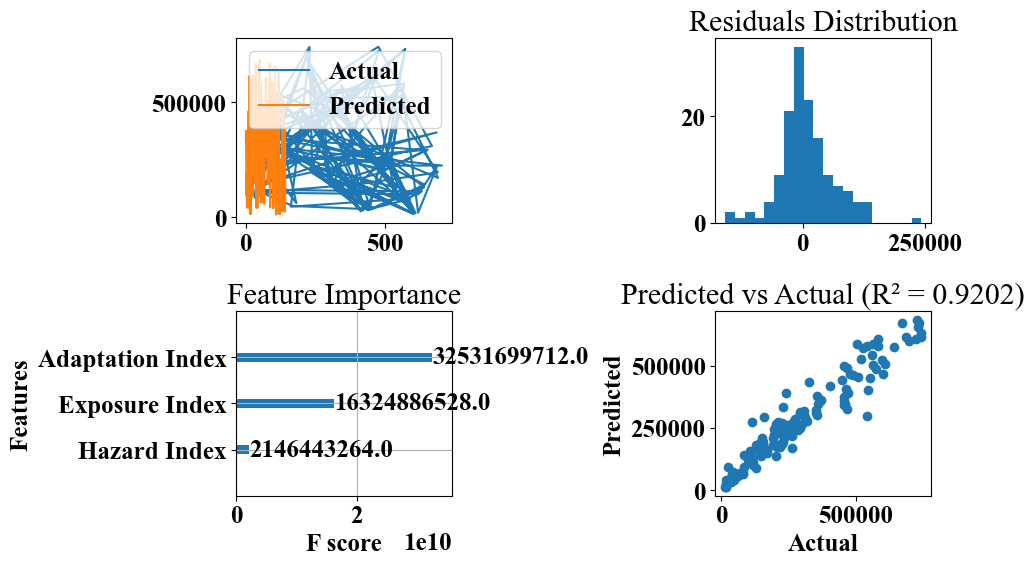

In [53]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score
import numpy as np

# 假设y_test和y_pred已经准备好
# 假设model是训练好的XGBoost模型

# 计算特征的重要性
importance = model.get_score(importance_type='gain')
total_gain = sum(importance.values())
normalized_importance = {k: v / total_gain for k, v in importance.items()}

# 打印每个特征的归一化增益占比
for feature, norm_value in normalized_importance.items():
    print(f"Feature: {feature}, Normalized Gain: {norm_value:.4f}")

# 计算R²值
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# 创建画布和子图
plt.figure(figsize=(10, 6))

# 1. 实际 vs 预测
plt.subplot(2, 2, 1)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
# plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# 2. 残差图
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')

# 3. 特征重要性图
plt.subplot(2, 2, 3)
xgb.plot_importance(model, ax=plt.gca(), importance_type="gain")
plt.title('Feature Importance')

# 4. 预测值与真实值的散点图，并显示R²
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual (R² = {r2:.4f})')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('PD-05-01-死亡人数预估-3指数-0.1.png', dpi=400, facecolor="none", transparent=True)

# 显示图形
plt.show()


## 正确算法-R2超参数

In [172]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split

# 假设你已经有了 X_train, y_train, X_test, y_test 数据

# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost参数空间
def xgb_evaluate(max_depth, gamma, subsample, colsample_bytree):
    params = {
        'eval_metric': 'rmse',
        'max_depth': int(max_depth),
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eta': 0.1
    }
    
    # 进行交叉验证
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, early_stopping_rounds=10)
    
    # 获取模型的预测值
    # 由于 cv_result 中并不直接提供 y_pred，可以在 XGBoost 中利用早停回合来获取
    best_iteration = cv_result.shape[0] - 1
    model = xgb.train(params, dtrain, num_boost_round=best_iteration)
    y_pred = model.predict(dtest)
    
    # 计算 R2 得分
    r2 = r2_score(y_test, y_pred)
    
    # 返回负的 R2（因为贝叶斯优化是最小化目标，所以我们返回负值来最大化 R2）
    return r2

# 贝叶斯优化
xgb_bo = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 10),
        'gamma': (0, 5),
        'subsample': (0.5, 1),
        'colsample_bytree': (0.5, 1)
    },
    random_state=42
)

# 启动优化过程
xgb_bo.maximize(init_points=5, n_iter=25)

# 获取最优参数
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
print("params",params)
# 输出优化记录到 CSV
df = pd.DataFrame(xgb_bo.res)
df.to_csv('optimization_results.csv', index=False)

# 使用最优参数训练模型
model = xgb.train(params, dtrain, num_boost_round=100)

# 预测
y_pred = model.predict(dtest)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)

# 计算真实值的平均值
y_test_mean = np.mean(y_test)

# 计算 RMSE%
rmse_percent = (rmse / y_test_mean) * 100

# 打印结果
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Root Mean Squared Error (RMSE%) = {rmse_percent:.2f}%')

# 计算 R2
R2 = r2_score(y_test, y_pred)
print(f'R2: {R2}')


|   iter    |  target   | colsam... |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------
| 1         | 0.8942    | 0.6873    | 4.754     | 8.124     | 0.7993    |
| 2         | 0.8333    | 0.578     | 0.78      | 3.407     | 0.9331    |
| 3         | 0.9017    | 0.8006    | 3.54      | 3.144     | 0.985     |
| 4         | 0.9016    | 0.9162    | 1.062     | 4.273     | 0.5917    |
| 5         | 0.7828    | 0.6521    | 2.624     | 6.024     | 0.6456    |
| 6         | 0.8975    | 0.8616    | 3.34      | 4.56      | 0.5319    |
| 7         | 0.7331    | 0.5246    | 0.09242   | 7.204     | 0.8619    |
| 8         | 0.7829    | 0.5022    | 0.2018    | 6.265     | 0.6761    |
| 9         | 0.913     | 1.0       | 2.387     | 3.698     | 0.5       |
| 10        | 0.913     | 1.0       | 5.0       | 3.922     | 0.5       |
| 11        | 0.9177    | 1.0       | 5.0       | 10.0      | 0.5       |
| 12        | 0.7167    | 0.5       | 

Feature: Hazard Index, Normalized Gain: 0.0421
Feature: Exposure Index, Normalized Gain: 0.3201
Feature: Adaptation Index, Normalized Gain: 0.6378
R²: 0.9202


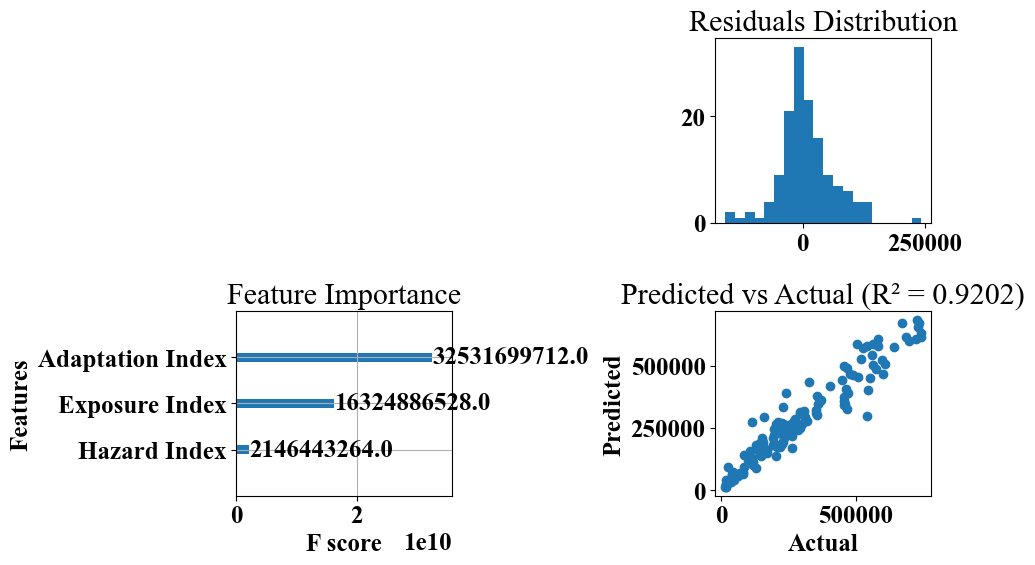

In [73]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score
import numpy as np

# 假设y_test和y_pred已经准备好
# 假设model是训练好的XGBoost模型

# 计算特征的重要性
importance = model.get_score(importance_type='gain')
total_gain = sum(importance.values())
normalized_importance = {k: v / total_gain for k, v in importance.items()}

# 打印每个特征的归一化增益占比
for feature, norm_value in normalized_importance.items():
    print(f"Feature: {feature}, Normalized Gain: {norm_value:.4f}")

# 计算R²值
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# 创建画布和子图
plt.figure(figsize=(10, 6))

# # 1. 实际 vs 预测
# plt.subplot(2, 2, 1)
# plt.plot(y_test, label='Actual')
# plt.plot(y_pred, label='Predicted')
# # plt.title('Actual vs Predicted Stock Prices')
# plt.legend()

# 2. 残差图
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')

# 3. 特征重要性图
plt.subplot(2, 2, 3)
xgb.plot_importance(model, ax=plt.gca(), importance_type="gain")
plt.title('Feature Importance')

# 4. 预测值与真实值的散点图，并显示R²
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual (R² = {r2:.4f})')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('PD-05-01-死亡人数预估-3指数-0.2.png', dpi=400, facecolor="none", transparent=True)

# 显示图形
plt.show()

## 残差分析

Mean Squared Error: 3295280921.9612694
Root Mean Squared Error (RMSE): 57404.53746840287
Root Mean Squared Error (RMSE%) = 20.38%
R2: 0.9201979147885517


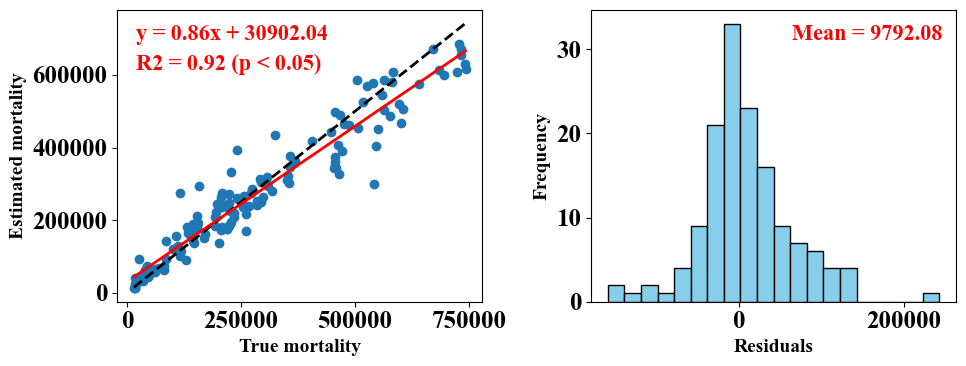

In [176]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy import stats

# 假设 y_test 和 y_pred 已经计算得到
# 使用模型进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)
# 计算真实值的平均值
y_test_mean = np.mean(y_test)
# 计算 RMSE%
rmse_percent = (rmse / y_test_mean) * 100
# 计算 R2
R2 = r2_score(y_test, y_pred)

# 打印结果
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Root Mean Squared Error (RMSE%) = {rmse_percent:.2f}%')
print(f'R2: {R2}')

# 计算残差的均值
residuals = y_test - y_pred
residuals_mean = np.mean(residuals)

# 进行正态性检验（Shapiro-Wilk）
stat, p_value = stats.shapiro(residuals)

# 创建一个包含两个子图的大图，1行2列
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 左侧子图：绘制散点图
axes[0].scatter(y_test, y_pred)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 对角虚线
axes[0].set_xlabel('True mortality', fontsize=14)
axes[0].set_ylabel('Estimated mortality', fontsize=14)

# 计算线性回归拟合直线
slope, intercept = np.polyfit(y_test, y_pred, 1)  # 拟合线性回归直线
line_x = np.array([y_test.min(), y_test.max()])
line_y = slope * line_x + intercept

# 绘制回归线
axes[0].plot(line_x, line_y, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}', linewidth=2)

# 在左上角添加 RMSE% 和 R2 的文本标注
# 在左上角添加回归方程
axes[0].text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}', transform=axes[0].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')
# axes[0].text(0.05, 0.95, f'RMSE% = {rmse_percent:.2f}%', transform=axes[0].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')
axes[0].text(0.05, 0.85, f'R2 = {R2:.2f} (p < 0.05)', transform=axes[0].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')

# 右侧子图：绘制残差分布图
axes[1].hist(residuals, bins=20, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Residuals', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# 在右上角添加残差均值和正态性分析结果
axes[1].text(0.55, 0.95, f'Mean = {residuals_mean:.2f}', transform=axes[1].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')
# axes[1].text(0.05, 0.85, f'Shapiro-Wilk p-value = {p_value:.4f}', transform=axes[1].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')

# 调整子图之间的间距
plt.tight_layout()

# 保存图形为文件
plt.savefig('PD-05-02-散点图和残差图.png', dpi=400, facecolor="none", transparent=True)

# 显示图形
plt.show()


## 重要程度分析

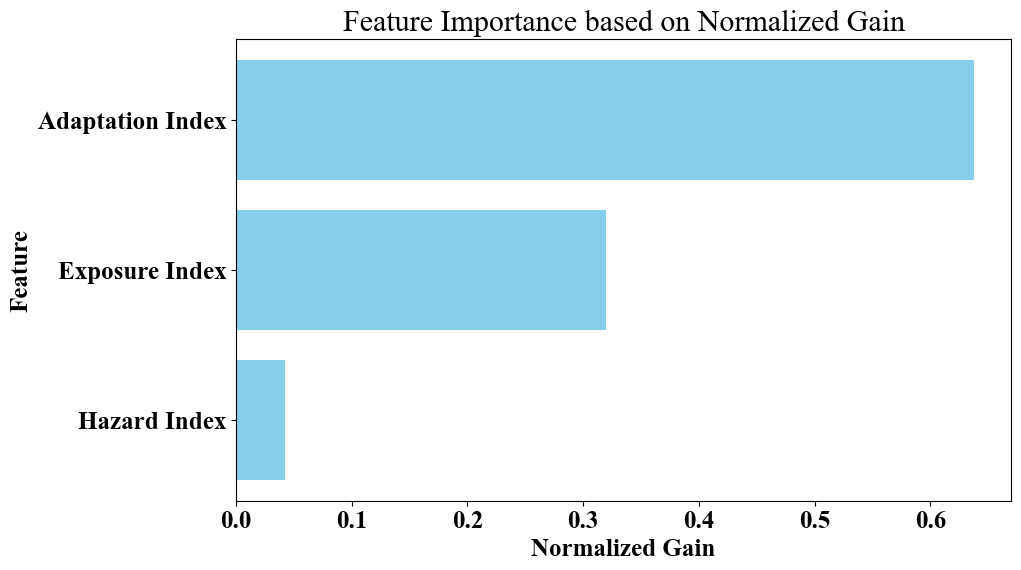

In [74]:
import matplotlib.pyplot as plt

# 计算特征的重要性
importance = model.get_score(importance_type='gain')
total_gain = sum(importance.values())

# 归一化每个特征的增益
normalized_importance = {k: v / total_gain for k, v in importance.items()}

# 将归一化的重要性值按降序排列
sorted_importance = sorted(normalized_importance.items(), key=lambda x: x[1], reverse=True)

# 分离特征名和对应的归一化增益值
features, norm_values = zip(*sorted_importance)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(features, norm_values, color='skyblue')
plt.xlabel('Normalized Gain')
plt.ylabel('Feature')
plt.title('Feature Importance based on Normalized Gain')
plt.gca().invert_yaxis()  # 反转 y 轴，使得最重要的特征在上面
plt.show()


Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from current font.
Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from current font.
Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from current font.
Glyph 33030 (\N{CJK UNIFIED IDEOGRAPH-8106}) missing from current font.
Glyph 24369 (\N{CJK UNIFIED IDEOGRAPH-5F31}) missing from current font.
Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
Glyph 26292 (\N{CJK UNIFIED IDEOGRAPH-66B4}) missing from curren

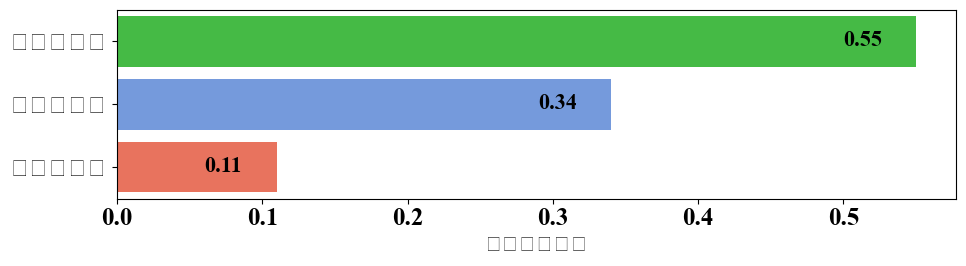

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 设置中文字体
# rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为 SimHei (黑体)

# 设置数字字体为 Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 设置中文字体为楷体
rcParams['font.sans-serif'] = ['KaiTi']  # 设置默认字体为 KaiTi (楷体)
# rcParams['axes.unicode_minus'] = False  # 正常显示负号




# 假设这是计算得到的特征重要性结果
normalized_importance = {
    '社会脆弱性': 0.55,
    '人口暴露度': 0.34,
    '热浪危险性': 0.11
}

# 将特征和归一化增益转化为列表形式，方便绘图
features = list(normalized_importance.keys())
norm_values = list(normalized_importance.values())

# 绘制条形图
plt.figure(figsize=(10, 3))
# 定义自定义的颜色
custom_palette = ['limegreen', 'cornflowerblue', 'tomato']

# 绘制条形图，使用自定义的颜色
# plt.figure(figsize=(10, 6))
ax = sns.barplot(x=norm_values, y=features, palette=custom_palette)
# ax = sns.barplot(x=norm_values, y=features, palette='coolwarm')

# 在每个条形左侧显示数值
for i, norm_value in enumerate(norm_values):
    ax.text(norm_value - 0.05, i, f'{norm_value:.2f}', va='center', fontsize=16)  # 调整 -0.05 使得文本在条形左侧

# 设置图形标题和标签
plt.xlabel('指数重要程度', fontsize=16)

# 显示图形
plt.tight_layout()

plt.savefig('PD-05-03-指数重要程度.png', dpi=400, facecolor="none", transparent=True)

plt.show()

['HWF', 'HWM', 'HWN', 'Area', '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', '居民最低生活保障人数(万人)', '城市居民最低生活保障人数(万人)', '农村居民最低生活保障人数(万人)', '居民最低生活保障人数(人)', '15岁及以上文盲人口数(人口抽样调查)(人)', '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', '每万人医疗机构床位数(张)', '卫生人员数(万人)', '卫生人员数(人)', '平均预期寿命(岁)', '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', '人均日生活用水量(升)', '自动气象站站点个数(个)', '居民平均每百户年末移动电话拥有量(部)', '互联网上网人数(万人)', '互联网上网人数(人)', '人均城市道路面积(平方米)', '年末常住人口(万人)', '人口死亡率(‰)', '人口死亡数量(人)', 'Hazard Index', 'Exposure Index', 'Adaptation Index', '夏季人口死亡数量(人)']
|   iter    |  target   | colsam... |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------
| 1         | -7.515e+0 | 0.6873    | 4.754     | 8.124     | 0.7993    |
| 2         | -7.088e+0 | 0.578     | 0.78      | 3.407     | 0.9331    |
| 3         | -7.112e+0 | 0.8006    | 3.54      | 3.144     | 0.985     |
| 4         | -7.232e+0 | 0.9162    | 1.062     | 4.273     | 0.5917    |
| 5         | -7.278e+0 | 0.6521    | 2.624

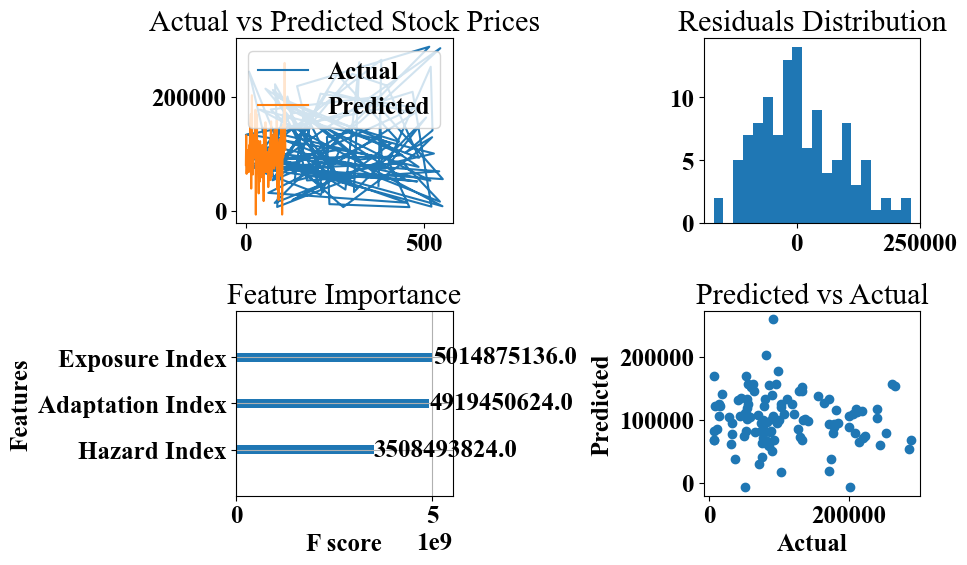

In [75]:
# 载入之前保存的 'area_mean_by_province_year_with_chinese' 数据
yearbook_file = 'hazard_exposure_adaptation_index_results_2004_2021_summer.xlsx'
model_data = pd.read_excel(yearbook_file, sheet_name='Sheet1')

feature_names = model_data.columns.tolist()[4::]
print(feature_names)

# List of columns to select
columns_to_select = [
    'Hazard Index', 'Exposure Index', 'Adaptation Index'
    # ,
    # '65岁及以上人口数(人口抽样调查)(人)', '女性人口数(人口抽样调查)(人)', 
    # '居民最低生活保障人数(万人)', '15岁及以上文盲人口数(人口抽样调查)(人)', 
    # '人均地区生产总值(元/人)', '全体居民人均可支配收入(元)', 
    # '每万人医疗机构床位数(张)', '卫生人员数(万人)', '平均预期寿命(岁)', 
    # '人均公园绿地面积(平方米/人)', '居民平均每百户年末空调拥有量(台)', 
    # '人均日生活用水量(升)', '自动气象站站点个数(个)', 
    # '居民平均每百户年末移动电话拥有量(部)', '互联网上网人数(万人)', 
    # '人均城市道路面积(平方米)'
]

# # Select the columns from the DataFrame
# X = model_data[columns_to_select]
# y = model_data["消化系统疾病死亡数量"]

import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 删除目标变量 y 中值为0的行
non_zero_data = model_data[model_data['夏季人口死亡数量(人)'] != 0]

# 更新 X 和 y 数据
X = non_zero_data[columns_to_select]
y = non_zero_data["夏季人口死亡数量(人)"]

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost参数空间
def xgb_evaluate(max_depth, gamma, subsample, colsample_bytree):
    params = {
        'eval_metric': 'rmse',
        'max_depth': int(max_depth),
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eta': 0.1
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, early_stopping_rounds=10)
    return -cv_result['test-rmse-mean'].min()

# 贝叶斯优化
xgb_bo = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 10),
        'gamma': (0, 5),
        'subsample': (0.5, 1),
        'colsample_bytree': (0.5, 1)
    },
    random_state=42
)
xgb_bo.maximize(init_points=5, n_iter=25)

# 获取最优参数
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# 使用最优参数训练模型
model = xgb.train(params, dtrain, num_boost_round=100)

# 预测
y_pred = model.predict(dtest)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



# 画图
plt.figure(figsize=(10, 6))

# 实际 vs 预测
plt.subplot(2, 2, 1)
plt.plot(y_test, label='Actual')  # 直接使用y_test，而非y_test.values
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# 残差图
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')

# 特征重要性图
plt.subplot(2, 2, 3)
xgb.plot_importance(model, ax=plt.gca(), importance_type="gain")
plt.title('Feature Importance')

# 预测值与真实值的散点图
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

plt.tight_layout()
plt.savefig('PD-05-01-夏季死亡人数-指数3333.png', dpi=400, facecolor="none", transparent=True)
plt.show()


Feature: Hazard Index, Normalized Gain: 0.2610
Feature: Exposure Index, Normalized Gain: 0.3731
Feature: Adaptation Index, Normalized Gain: 0.3660
R²: -0.4666


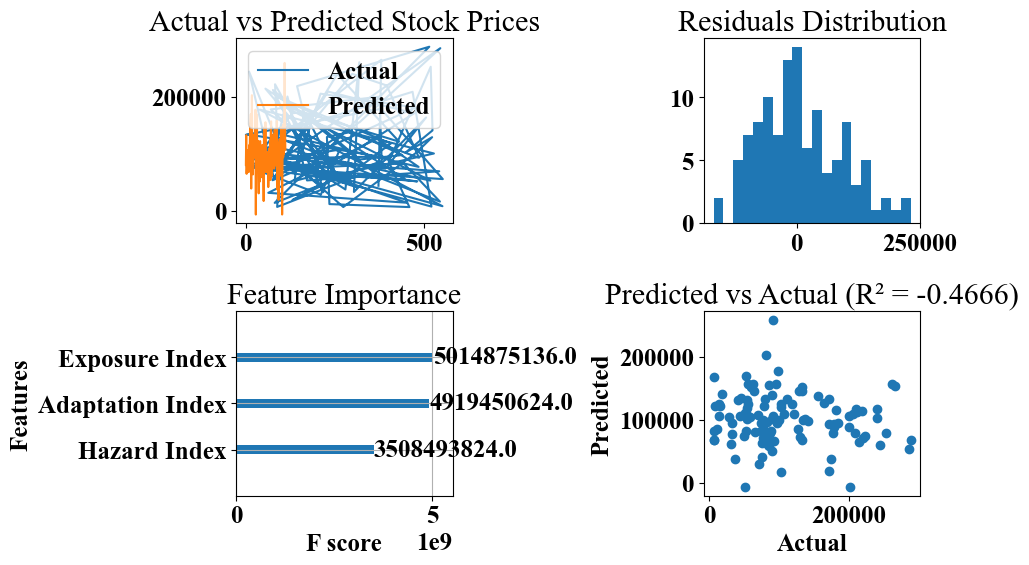

In [76]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score
import numpy as np

# 假设y_test和y_pred已经准备好
# 假设model是训练好的XGBoost模型

# 计算特征的重要性
importance = model.get_score(importance_type='gain')
total_gain = sum(importance.values())
normalized_importance = {k: v / total_gain for k, v in importance.items()}

# 打印每个特征的归一化增益占比
for feature, norm_value in normalized_importance.items():
    print(f"Feature: {feature}, Normalized Gain: {norm_value:.4f}")

# 计算R²值
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

# 创建画布和子图
plt.figure(figsize=(10, 6))

# 1. 实际 vs 预测
plt.subplot(2, 2, 1)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# 2. 残差图
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')

# 3. 特征重要性图
plt.subplot(2, 2, 3)
xgb.plot_importance(model, ax=plt.gca(), importance_type="gain")
plt.title('Feature Importance')

# 4. 预测值与真实值的散点图，并显示R²
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual (R² = {r2:.4f})')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('PD-05-01-夏季死亡人数-指数3333.png', dpi=400, facecolor="none", transparent=True)

# 显示图形
plt.show()